# Analysing LFP phase synchronisation 

I extracted signal windows from Grion et al. of LFP data around touch start timestamps, for rat 3.

Let's plot the results of rayleigh test on theses windows.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [13]:
DATA_FILE = "../../../data/grion_lfp_windows_r3_df.out"
df = pd.read_pickle(DATA_FILE)

In [14]:
df.head()

LFP   
0  [780.445922442271, 795.0029746794954, 796.1244...  \
1  [-364.0, -364.1741783224925, -362.038968509885...   
2  [-671.8850314396695, -675.3842587632649, -665....   
3  [-144.2908428589106, -143.34183142958418, -110...   
4  [-314.0753428183525, -308.2714036197555, -323....   

                                           LFP_times   
0  [-2.0, -1.9994999374921865, -1.998999874984373...  \
1  [-2.0, -1.9994999374921865, -1.998999874984373...   
2  [-2.0, -1.9994999374921865, -1.998999874984373...   
3  [-2.0, -1.9994999374921865, -1.998999874984373...   
4  [-2.0, -1.9994999374921865, -1.998999874984373...   

                                        LFP_filtered   
0  [220.36029032506914, 258.36326357609704, 268.6...  \
1  [-283.94080997176036, -173.3360806491319, -38....   
2  [-335.8286836144664, -360.31240086068493, -332...   
3  [-67.04915144826894, 30.0298897396035, 121.274...   
4  [13.92921466610747, -70.14761990172248, -139.8...   

                                  LFP_filtered_times   
0  [-2.0, -1.9919839679358717, -1.983967935871743...  \
1  [-2.0, -1.9919839679358717, -1.983967935871743...   
2  [-2.0, -1.9919839679358717, -1.983967935871743...   
3  [-2.0, -1.9919839679358717, -1.983967935871743...   
4  [-2.0, -1.9919839679358717, -1.983967935871743...   

                                         LFP_hilbert   
0  [-2.705613632557494, -2.332385961315842, -1.95...  \
1  [1.1459319556236864, 1.528760139090291, 1.9137...   
2  [-2.2182302763057677, -2.069888768750193, -1.9...   
3  [0.24918352811422367, 0.6726274138264988, 1.09...   
4  [0.5450011878787345, 0.9242391408808268, 1.303...   

                                   LFP_hilbert_times  
0  [-2.0, -1.9919839679358717, -1.983967935871743...  
1  [-2.0, -1.9919839679358717, -1.983967935871743...  
2  [-2.0, -1.9919839679358717, -1.983967935871743...  
3  [-2.0, -1.9919839679358717, -1.983967935871743...  
4  [-2.0, -1.9919839679358717, -1.983967935871743...

<Figure size 640x480 with 0 Axes>

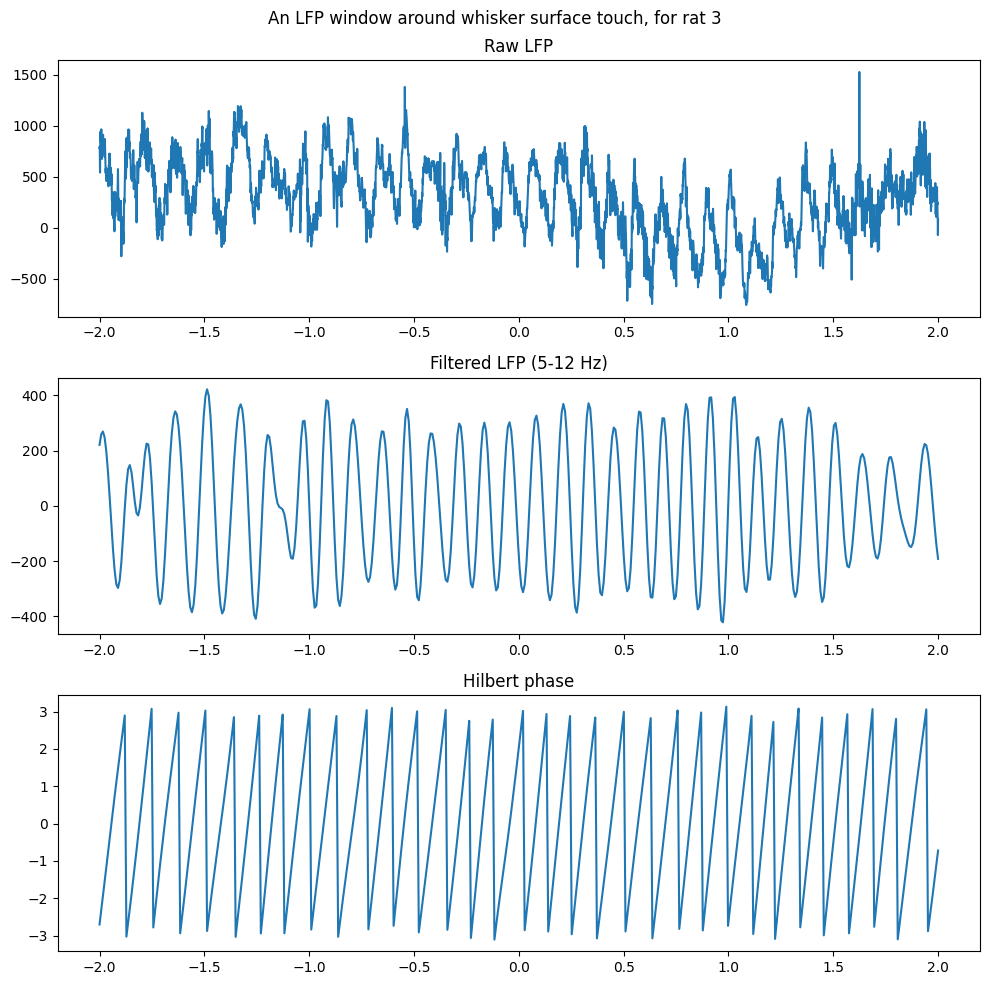

In [15]:
def plot_stack(df_row, title="An LFP window around whisker surface touch, for rat 3"):
    plt.figure()
    fig, axs = plt.subplots(3, 1, figsize=(10, 10))
    axs[0].plot(df_row["LFP_times"], df_row["LFP"])
    axs[0].set_title("Raw LFP")
    axs[1].plot(df_row["LFP_filtered_times"], df_row["LFP_filtered"])
    axs[1].set_title("Filtered LFP (5-12 Hz)")
    axs[2].plot(df_row["LFP_hilbert_times"], df_row["LFP_hilbert"])
    axs[2].set_title("Hilbert phase")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
plot_stack(df.iloc[0])

<Figure size 640x480 with 0 Axes>

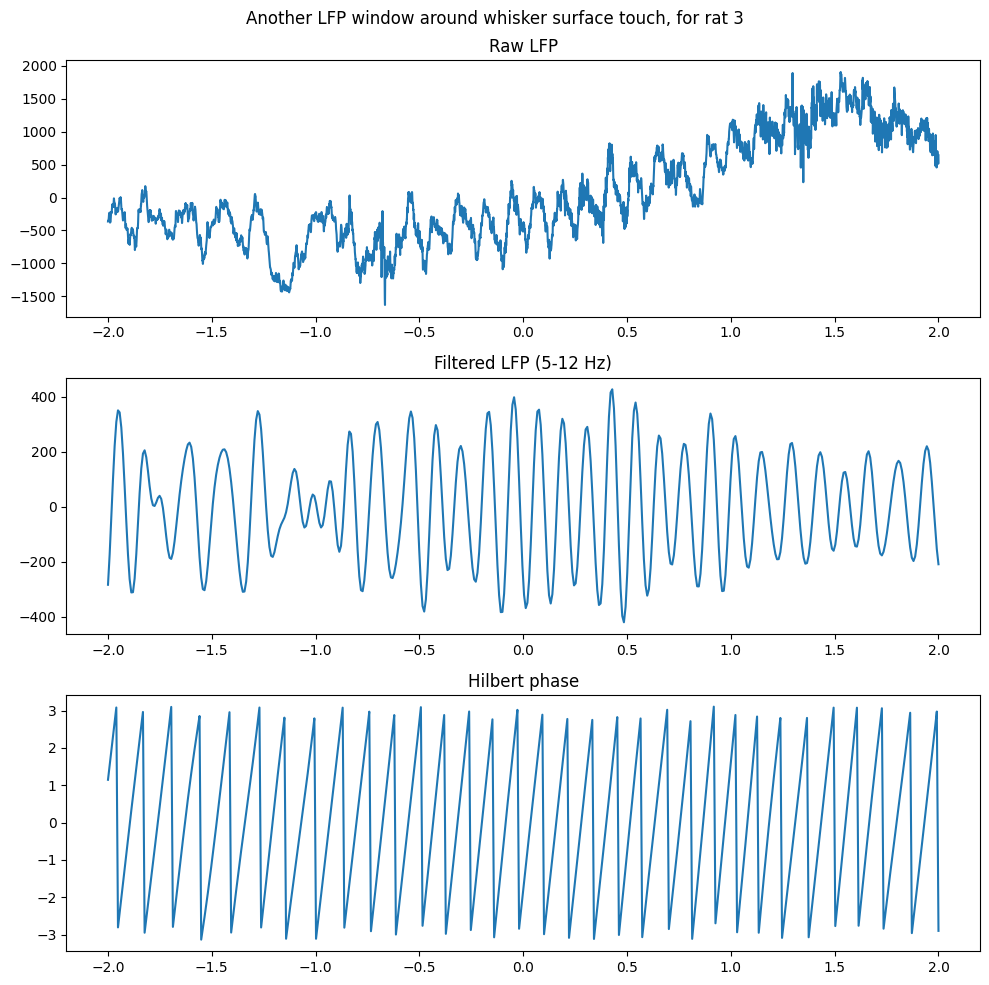

In [16]:
plot_stack(df.iloc[1], title="Another LFP window around whisker surface touch, for rat 3")

## Perform Rayleigh tests

In [17]:
import astropy.stats as astats
import scipy.stats as sstats


In [18]:
def phase_synchronisation(df_rows):
    envelope_array = np.array([row["LFP_hilbert"] for _, row in df_rows.iterrows()])
    rayleigh_pvalues = astats.rayleightest(envelope_array, axis=0)
    rayleigh_zscore = sstats.norm.ppf(rayleigh_pvalues)
    return rayleigh_zscore

zscores = phase_synchronisation(df)

In [19]:

zscores.shape
df["LFP_hilbert_times"][0].shape

(500,)

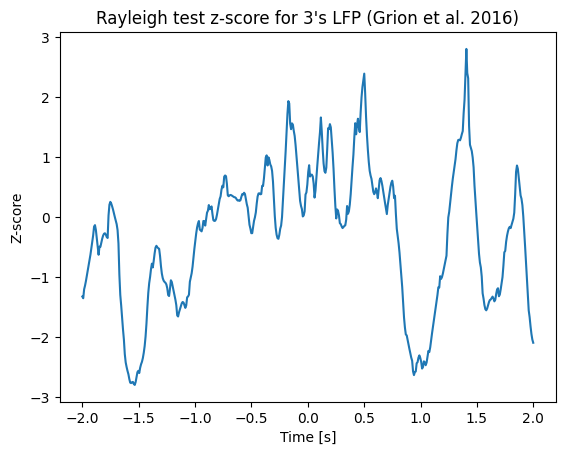

In [20]:
RAT = 3
plt.figure()
plt.xlabel("Time [s]")
plt.plot(df["LFP_hilbert_times"][0], zscores)
plt.ylabel("Z-score")
plt.title("Rayleigh test z-score for {}'s LFP (Grion et al. 2016)".format(RAT))
plt.savefig(os.path.join("../../media/plots", "rayleigh_zscore_LFP_rat{}_lfp_5-12Hz.png".format(RAT)))

## analysis of data across rats

In [21]:
rats = [3, 4, 5, 6]
raileigh_zscores = []
time = df["LFP_hilbert_times"][0]
for rat in rats:
    df = pd.read_pickle("../../../data/grion_lfp_windows_r{}_df.out".format(rat))
    zscores = phase_synchronisation(df)
    raileigh_zscores.append(zscores)


In [25]:
# Set a dataframe with the zscores
df_zscores = pd.DataFrame(raileigh_zscores)
df_zscores.head()

0         1         2         3         4         5         6     
0 -1.322956 -1.351936 -1.202788 -1.140761 -1.063791 -0.974205 -0.885824  \
1  0.653174  0.899064  1.121280  1.274723  1.420428  1.658297  1.891692   
2  2.739117  2.068482  1.752191  1.556911  1.417692  1.361523  1.313027   
3 -0.747402 -0.885347 -1.081976 -1.134630 -1.055816 -0.999153 -1.081784   

        7         8         9    ...       490       491       492       493   
0 -0.791331 -0.697863 -0.624004  ... -0.487787 -0.751018 -1.009022 -1.276128  \
1  1.468743  0.649999  0.260520  ...  0.022953  0.169350  0.341016  0.545015   
2  1.134626  1.041999  1.186662  ... -0.355300 -0.259197 -0.293652 -0.369768   
3 -1.032952 -0.887511 -0.786807  ... -0.499859 -0.161535  0.273230  0.619320   

        494       495       496       497       498       499  
0 -1.555021 -1.666459 -1.817588 -1.946724 -2.040872 -2.094541  
1  0.755925  0.945698  1.081087  1.033218  0.899849  0.752208  
2 -0.526564 -0.667782 -0.649814 -0.581393 -0.520615 -0.463382  
3  0.644189  0.746135  0.797280  0.509554  0.237675  0.148743  

[4 rows x 500 columns]

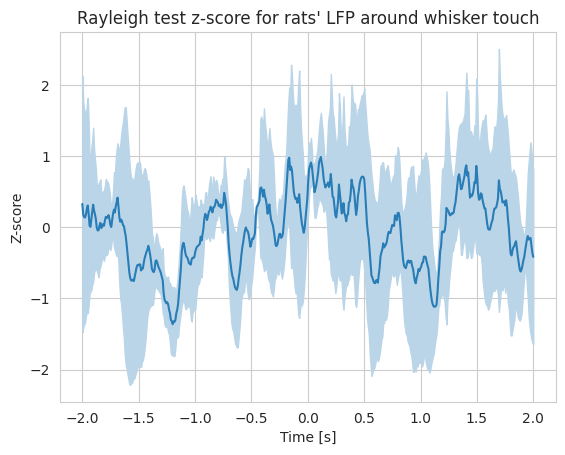

In [38]:
sns.set_style("whitegrid")
plt.figure()
plt.xlabel("Time [s]")
plt.ylabel("Z-score")
plt.title("Rayleigh test z-score for rats' LFP around whisker touch")
# Plot the mean zscore and the standard deviation
plt.fill_between(time, df_zscores.mean(axis=0) - df_zscores.std(axis=0), df_zscores.mean(axis=0) + df_zscores.std(axis=0), color="#bbd5e8", label="Standard deviation")
plt.plot(time, df_zscores.mean(axis=0), color="#287db7", label="Mean z-score")